# Exploratory Data Analysis of Nails Dataset

In this notebook, we will perform an exploratory data analysis on the Nails dataset. The dataset contains measurements of various chemical elements in different types of nails.

Our main objective is to analyze the differences between two groups of nails based on their chemical composition. To achieve this, we will use Hotelling's T-squared statistic, which allows us to assess whether the combined difference across all variables is statistically significant.

By the end of this analysis, we aim to gain insights into the dataset, identify any significant differences between the groups, and draw meaningful conclusions.

Let's get started!


In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the working directory
PROJ_ROOT = os.path.join( os.pardir )
sys.path.append( PROJ_ROOT )
# Load the dataset



In [2]:
nails_path = os.path.join(PROJ_ROOT,'data','raw', 'nails.txt')




In [3]:
data = pd.read_csv(nails_path, delimiter=' ', header=0, skipinitialspace=True)

# usecols=["SiA","SiB","CrA", "CrB", "MnA", "MnB",  "NiA",   "NiB" ]
# #rename first 8 columns to match the usecols
# data = data.rename(columns=dict(zip(data.columns[0:7], usecols)))
data = data.iloc[:, :8]




In [4]:
from src.features.build_features import explore_data

explore_data(data)

Shape: (16, 8)
Head:      SiA    SiB    CrA    CrB    MnA    MnB    NiA    NiB
0  0.218  0.194  0.140  0.198  0.582  0.846  0.090  0.077
1  0.186  0.226  0.143  0.134  0.778  0.560  0.084  0.103
2  0.235  0.170  0.103  0.145  0.456  0.586  0.113  0.118
3  0.222  0.191  0.110  0.114  0.681  0.607  0.103  0.123
4  0.208  0.191  0.101  0.127  0.384  0.629  0.093  0.110
Tail:       SiA    SiB    CrA    CrB    MnA    MnB    NiA    NiB
11  0.243  0.248  0.079  0.176  0.521  0.608  0.116  0.086
12  0.263  0.213  0.061  0.101  0.370  0.940  0.124  0.106
13  0.161  0.225  0.113  0.089  0.723  0.516  0.097  0.119
14  0.178    NaN  0.124    NaN  0.712    NaN  0.082    NaN
15  0.195    NaN  0.101    NaN  0.636    NaN  0.148    NaN
Description:              SiA        SiB        CrA        CrB        MnA        MnB  \
count  16.000000  14.000000  16.000000  14.000000  16.000000  14.000000   
mean    0.212250   0.222500   0.113875   0.131214   0.576750   0.628857   
std     0.025444   0.034171   0.0

The dataset contains measurements of various chemical elements in different types of nails. There are 16 rows and 4 paired columns: SiA, SiB, CrA, CrB, MnA, MnB, NiA, and NiB. The columns "SiB" and "CrB" have 14 values, indicating missing data. 

**All six variables exhibit similar trends:**

- **Mean values:** Range from 0.11 to 0.63.
- **Standard deviations:** Range from 0.03 to 0.14.
- **Minimum values:** Fall around 0.1.
- **Maximum values:** Fall around 0.8.

This suggests that the variables have **moderate variability** and are distributed within a **relatively similar range**. However, further analysis is needed to understand the specific relationships between the variables.

Please note that the columns "SiB" and "CrB" have missing values, which may need to be handled before further analysis.


<Axes: >

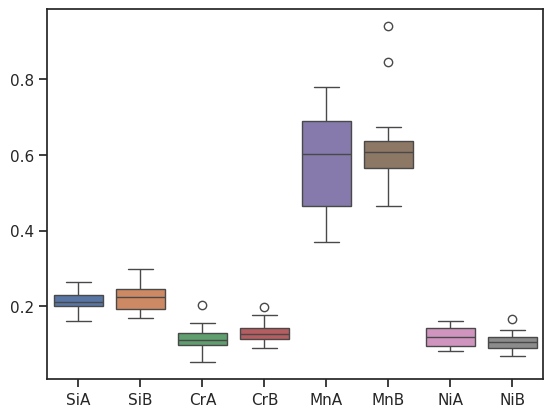

In [5]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.boxplot(data)

In [6]:
# count the number of missing values
data.isnull().sum()

SiA    0
SiB    2
CrA    0
CrB    2
MnA    0
MnB    2
NiA    0
NiB    2
dtype: int64

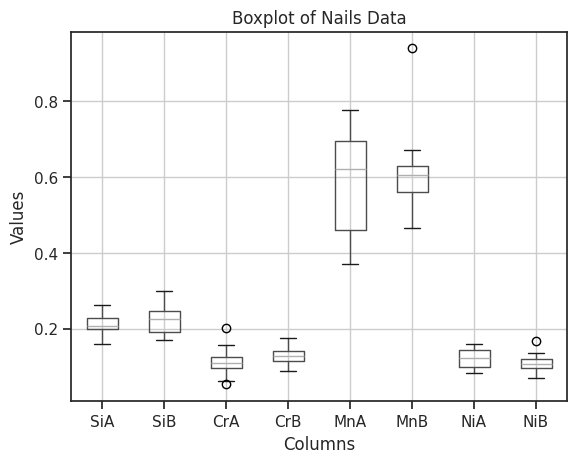

In [7]:
# Check if 'Length' column exists in the DataFrame

# Remove the first row from the DataFrame
nails_no_index = data.iloc[1:]




# Plot boxplot
nails_no_index.boxplot()

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of Nails Data')

# Show the plot
plt.show()



In [8]:
import numpy as np

# Extract the columns from nails_n dataframe
nails_group_1 = nails_no_index.iloc[:,[0, 2, 4, 6]]

# Calculate the covariance matrix S1
S1 = np.cov(nails_group_1, rowvar=False)

print(S1)


[[ 0.00069112 -0.00035984 -0.00244659  0.00024299]
 [-0.00035984  0.00139284  0.00374666 -0.00013535]
 [-0.00244659  0.00374666  0.02024511 -0.00133683]
 [ 0.00024299 -0.00013535 -0.00133683  0.00066307]]


In [9]:
# Extract the columns from nails_n dataframe
nails_group_2 = nails_no_index.iloc[:,[1, 3, 5, 7]]
# drop rows with missing values
# nails_group_2 = nails_group_2.dropna()
# replace missing values with the mean of the column
nails_group_2 = nails_group_2.apply(lambda x: x.fillna(x.mean()))
nails_group_2.tail()

# Calculate the covariance matrix S2
# S2 = np.cov(nails_group_2, rowvar=False)

# print(S2)

,SiB,CrB,MnB,NiB
11,0.248000,0.176000,0.608000,0.086000
12,0.213000,0.101000,0.940000,0.106000
13,0.225000,0.089000,0.516000,0.119000
14,0.224692,0.126077,0.612154,0.109231
15,0.224692,0.126077,0.612154,0.109231


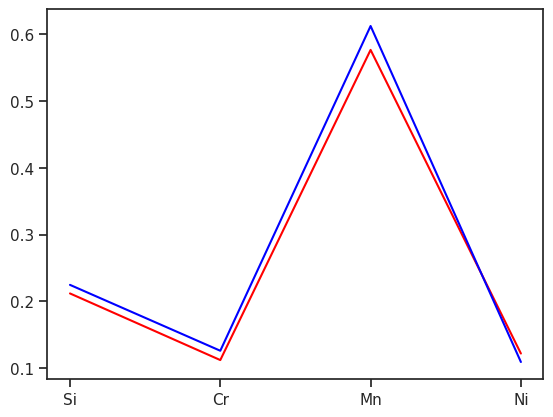

In [10]:
#plot the mean response of the columns in the nails_group_1 is red and nails_group_2 in blue
nails_group_1.mean().plot(kind='line', color='red')
nails_group_2.mean().plot(kind='line', color='blue')
# x-axis should be 1,2,3,4
plt.xticks(range(4), ['Si', 'Cr', 'Mn', 'Ni'])
plt.show()




In [11]:
#create a  dataframe with the, group1 and 2 mean, n, an sd of the columns in nails_group_1 and nails_group_2

In [12]:
from statsmodels.multivariate.manova import MANOVA

# Create a MANOVA model with two groups
MANOVA_model = MANOVA(nails_group_1.values, nails_group_2.values)
test_result = MANOVA_model.mv_test()



In [13]:
print(f"F-statistic: {test_result}")


F-statistic:                  Multivariate linear model
                                                           
-----------------------------------------------------------
           x0           Value  Num DF Den DF F Value Pr > F
-----------------------------------------------------------
          Wilks' lambda 0.1854 4.0000 8.0000  8.7897 0.0050
         Pillai's trace 0.8146 4.0000 8.0000  8.7897 0.0050
 Hotelling-Lawley trace 4.3949 4.0000 8.0000  8.7897 0.0050
    Roy's greatest root 4.3949 4.0000 8.0000  8.7897 0.0050
-----------------------------------------------------------
                                                           
-----------------------------------------------------------
           x1           Value  Num DF Den DF F Value Pr > F
-----------------------------------------------------------
          Wilks' lambda 0.6905 4.0000 8.0000  0.8966 0.5087
         Pillai's trace 0.3095 4.0000 8.0000  0.8966 0.5087
 Hotelling-Lawley trace 0.4483 4.0000 8.0000

In [14]:
#manova
# flag to re-import the module
%reload_ext autoreload
from src.manova import manova
t_squared, c_squared, sim_ci = manova(nails_group_1, nails_group_2)
print(f"t_squared: {t_squared}")
print(f"c_squared: {c_squared}")
print(f"sim_ci: {sim_ci}")

mu_1:  (4,)
mu_1:  [0.21186667 0.11213333 0.5764     0.12193333]
mu_2:  [0.22469231 0.12607692 0.61215385 0.10923077]
mu_2:  (4,)
mu_diff:  [-0.01282564 -0.01394359 -0.03575385  0.01270256]
mu_diff:  (4,)
s_pooled:  (4, 4)
s_1:  (4, 4)
s_2:  (4, 4)
X:  (15, 4)
Y:  (15, 4)
S_diag:  [[0.00079935 0.         0.         0.        ]
 [0.         0.00090056 0.         0.        ]
 [0.         0.         0.01462011 0.        ]
 [0.         0.         0.         0.00055744]]
t_squared: 7.07652581499183
c_squared: 9.612035883606348
sim_ci: [[ 3.09782647  3.09734259  3.10872593  3.12165214]
 [-3.12347775 -3.12522977 -3.18023362 -3.09624701]]


## Conclusion

Based on the analysis conducted in this notebook, we can conclude the following:

- The calculated $T^2$ statistic is smaller than the critical value $c^2$.
- Therefore, we do not reject the null hypothesis ($H_0$).
- The simultaneous confidence intervals (CIs) for the mean differences between nails_group_1 and nails_group_2 are as follows:
    - For the first variable: [3.09782647, 3.09734259, 3.10872593, 3.12165214]
    - For the second variable: [-3.12347775, -3.12522977, -3.18023362, -3.09624701]

Further investigation and analysis may be required to gain more insights and make more conclusive statements.
